In [383]:
clear()

In [384]:
# matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [385]:
# Artificial data generation
# 人工データ生成

N = 21 # # of samples
a = 1
X = np.linspace(-10, 10, N)  # -10, 10 to N equally divided data.
                              # -10, 10までをN個等分割にデータを作る．

noise_cov = 3
noise = np.random.normal(0, noise_cov,[N])
y = a * X + noise

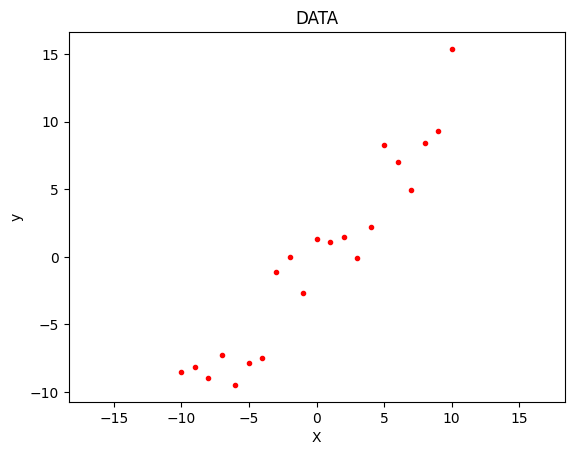

In [386]:
# Q1: Plot the artificial data.
# 問１：人工データのプロットしてください。
plt.plot(X,y,'r.')
plt.axis('equal')
plt.title('DATA')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [387]:
## #### Analyzing Artificial Data ######
###### Loading libraries for analysis #####
# 人工データの解析　~解析に用いるライブラリーの読み込み~
from sklearn import linear_model # sklearn.linear_model.LinearRegression
from sklearn.model_selection import LeaveOneOut # cross validation
from sklearn.metrics import mean_squared_error # RMSE

In [388]:
## Q2 : Generate a linear model with and without intercept, respectively.
# 問2 :　１次式のモデルのうち，切片があるモデルとないモデルをそれぞれ生成してください。
reg_ax_b = linear_model.LinearRegression(fit_intercept=True) ## (option to generate a model with an intercept)
                                                                              ## Hint: linear_model.LinearRegression, fit_intercept
reg_ax = linear_model.LinearRegression(fit_intercept=False)##( option to generate a model with no intercept)

In [389]:
# Evaluate performance with K-partition cross validation
# K分割交差検証（cross validation）で性能を評価する

loo = LeaveOneOut() # Generating training and tes data set for leave one out cross validation
MSE_ax   = {"mean": [], "std": []}
MSE_ax_b = {"mean": [], "std": []}

scores_ax   = []
scores_ax_b = []

In [390]:
# Leave one out cross validation data
for train_index, test_index in loo.split(X):
      #Test and Training data

      # Q3: Print train_index and test_index using print and check the test and training data.
      # 問3:　printをもちいて，train_index, test_indexをプリントし、テストデータとトレーニングデータを確認してください。
      print("%s %s" % (train_index, test_index))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20] [14]
[ 0  

In [391]:
# main part: leave one out cross validation
for train_index, test_index in loo.split(X):
      #Test and Training data
      X_train = X[train_index]
      X_test  = X[test_index]
      y_train, y_test = y[train_index], y[test_index]

       ## Q4: Please train a model for linear regression using trainig data.
       ##問４:　線形回帰のモデルをトレーニグデータを用いて学習してください。
      # fit by Linear regression
      reg_ax_b.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])
      reg_ax  .fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

      ## Q5: Using a linear regression model, make predictions about the test data.
      ## 問５:　線形回帰のモデルを用いて、テストデータについて予測してください。
      # predict
      pred_ax_b = reg_ax_b.predict(X_test[:, np.newaxis])
      pred_ax   = reg_ax.predict(X_test[:, np.newaxis])

      scores_ax_b.append(mean_squared_error(y_test, pred_ax_b))
      scores_ax.append((mean_squared_error(y_test, pred_ax)))

MSE_ax_b["mean"].append(np.mean(scores_ax_b))  # convert to positive
MSE_ax  ["mean"].append(np.mean(scores_ax))

print('Cross-validation error when y= ax+b as model: %.4f' % MSE_ax_b["mean"][0])
print('Cross-validation error when y= ax as model: %.4f' % MSE_ax["mean"][0])
#print('y= ax+bをモデルとしたときの交差検証誤差： %.4f' % MSE_ax_b["mean"][0])
#print('y= axをモデルとしたときの交差検証誤差： %.4f' % MSE_ax["mean"][0])

Cross-validation error when y= ax+b as model: 5.9065
Cross-validation error when y= ax as model: 5.3135


In [392]:
print("Extension work for more insights")

Extension work for more insights


In [393]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import LeaveOneOut

def fit_analysis(X, y):
    loo = LeaveOneOut() # Generating training and tes data set for leave one out cross validation
    MSE_ax   = {"mean": [], "std": []}
    MSE_ax_b = {"mean": [], "std": []}

    scores_ax   = []
    scores_ax_b = []
    
    
    # main part: leave one out cross validation
    for train_index, test_index in loo.split(X):
        
        reg_ax_b = linear_model.LinearRegression(fit_intercept=True) ## (option to generate a model with an intercept)
                                                                              ## Hint: linear_model.LinearRegression, fit_intercept
        reg_ax = linear_model.LinearRegression(fit_intercept=False)##( option to generate a model with no intercept)
        
        #Test and Training data
        X_train = X[train_index]
        X_test  = X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ## Q4: Please train a model for linear regression using trainig data.
        ##問４:　線形回帰のモデルをトレーニグデータを用いて学習してください。
        # fit by Linear regression
        reg_ax_b.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])
        reg_ax  .fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

        ## Q5: Using a linear regression model, make predictions about the test data.
        ## 問５:　線形回帰のモデルを用いて、テストデータについて予測してください。
        # predict
        pred_ax_b = reg_ax_b.predict(X_test[:, np.newaxis])
        pred_ax   = reg_ax.predict(X_test[:, np.newaxis])

        scores_ax_b.append(mean_squared_error(y_test, pred_ax_b))
        scores_ax.append((mean_squared_error(y_test, pred_ax)))

    MSE_ax_b["mean"].append(np.mean(scores_ax_b))  # convert to positive
    MSE_ax  ["mean"].append(np.mean(scores_ax))
    
    return MSE_ax["mean"][0], MSE_ax_b["mean"][0]


In [394]:
def plot(X, y, a):
    # for visualiation purpose fit on all data
    reg_ax_b_plot = linear_model.LinearRegression(fit_intercept=True) ## (option to generate a model with an intercept)
                                                                            ## Hint: linear_model.LinearRegression, fit_intercept
    reg_ax_plot = linear_model.LinearRegression(fit_intercept=False)##( option to generate a model with no intercept)
    reg_ax_plot.fit(X.reshape(-1, 1), y)
    reg_ax_b_plot.fit(X.reshape(-1, 1), y)
    
    fig, ax = plt.subplots(figsize=(6, 5))
    fig.suptitle('Comparison plot', fontsize=14)

    # data
    ax.plot(X, y, 'r.', label="Data")

    # true function
    ax.plot(X, a * X, 'k--', label="True function")

    
    # Fitted models
    X_plot = np.linspace(X.min(), X.max(), 100)
    ax.plot(X_plot, reg_ax_plot.predict(X_plot.reshape(-1, 1)), 
            'b-', label="Fit y=ax")
    ax.plot(X_plot, reg_ax_b_plot.predict(X_plot.reshape(-1, 1)), 
            'g-', label=f"Fit y=ax+b")
    
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

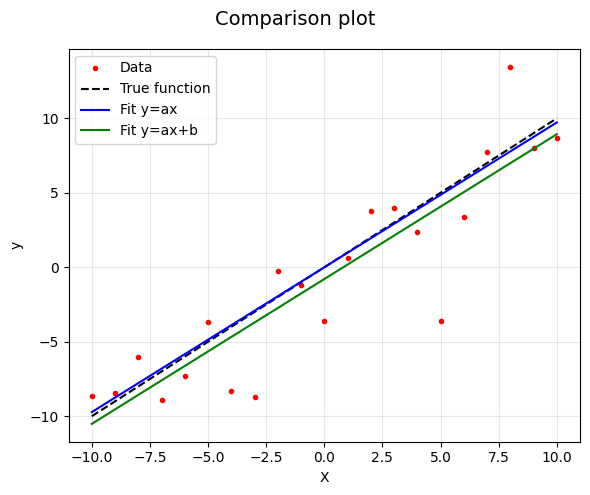

In [395]:
## to get more reliable results execute the experiments 20 times

evals_ax = []
evals_ax_b = []



for i in range (20):
    # Artificial data generation
    # 人工データ生成

    N = 21 # # of samples
    a = 1
    X = np.linspace(-10, 10, N)  # -10, 10 to N equally divided data.
                                # -10, 10までをN個等分割にデータを作る．

    noise_cov = 3
    noise = np.random.normal(0, noise_cov,[N])
    y = a * X + noise
    
    
    #show = (i == 19)
    eval_ax, eval_ax_b = fit_analysis(X, y)
    if i == 19:
        plot(X, y, a)
    evals_ax.append(eval_ax)
    evals_ax_b.append(eval_ax_b)
            


In [396]:
## mean error of 20 study

print('Cross-validation error when y= ax+b as model: %.4f' % np.mean(evals_ax_b))
print('Cross-validation error when y= ax as model: %.4f' % np.mean(evals_ax))

Cross-validation error when y= ax+b as model: 10.2998
Cross-validation error when y= ax as model: 9.9923


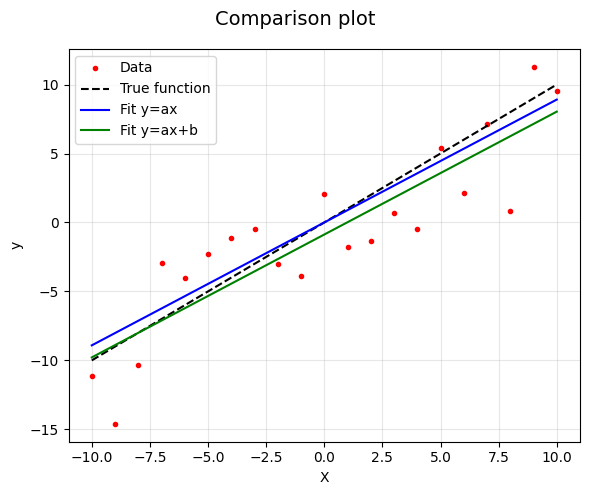

Case: 0 (Centered X)
Cross-validation error when y= ax+b as model: 10.5304
Cross-validation error when y= ax as model: 9.8224


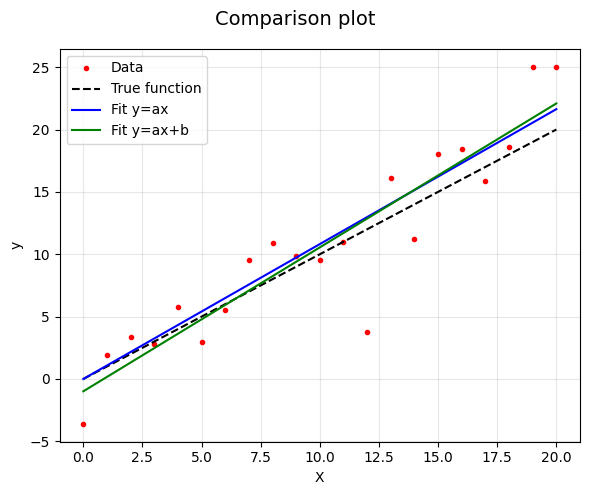

Case: 1 (Positive X)
Cross-validation error when y= ax+b as model: 10.4351
Cross-validation error when y= ax as model: 9.7827


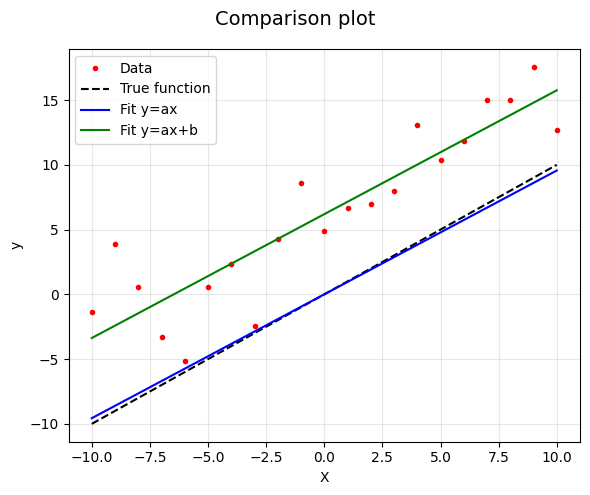

Case: 2 (Biased non zero noise)
Cross-validation error when y= ax+b as model: 9.0536
Cross-validation error when y= ax as model: 36.3295


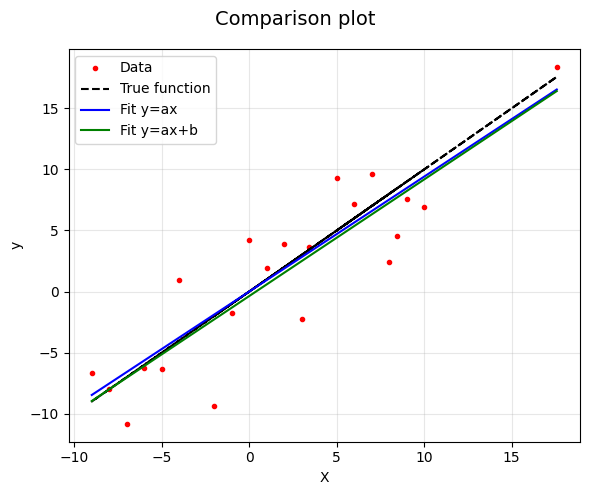

Case: 3 (X with outliers)
Cross-validation error when y= ax+b as model: 10.4054
Cross-validation error when y= ax as model: 9.8527


In [397]:
# exploring into why in some cases y = ax performs poorly

for case in range(4):
    evals_ax = []
    evals_ax_b = []
    for i in range(20):
        N = 21
        a = 1
        noise_cov = 3

        # Case 1: Centered X
        if case == 0:
            X = np.linspace(-10, 10, N)
            noise = np.random.normal(0, noise_cov, [N])
            label = "Centered X"

        # Case 2: Positive-biased X
        elif case == 1:
            X = np.linspace(0, 20, N)
            noise = np.random.normal(0, noise_cov, [N])
            label = "Positive X"

        # Case 3: Non-zero-mean noise
        elif case == 2:
            X = np.linspace(-10, 10, N)
            noise = np.random.normal(5, noise_cov, [N])  # biased noise
            label = "Biased non zero noise"

        # Case 4: X with outliers
        elif case == 3:
            X = np.linspace(-10, 10, N)
            X[::7] += np.random.uniform(10, 15, size=(len(X[::7])))  # Add large values every 7th element
            noise = np.random.normal(0, noise_cov, [N])
            label = "X with outliers"

        y = a * X + noise


        eval_ax, eval_ax_b = fit_analysis(X, y)
        if i ==19:
            plot(X, y, a)
        evals_ax.append(eval_ax)
        evals_ax_b.append(eval_ax_b)

    # plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    # plt.show()
    
    print(f"Case: {case} ({label})")
    print('Cross-validation error when y= ax+b as model: %.4f' % np.mean(evals_ax_b))
    print('Cross-validation error when y= ax as model: %.4f' % np.mean(evals_ax))
    
    evals_ax.clear()
    evals_ax_b.clear()
